### 导入模块

In [102]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pyplot

### 导入数据

In [19]:
titanic = pd.read_csv(r"C:\Users\Administrator\Desktop\train.csv")

### 前期预览
- head，tail，info，describe

In [139]:
# 快速预览，后五行，也可指定行数
titanic.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
# 快速预览，后五行，也可指定行数
titanic.tail()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


- 可以看到数据的大致类型，以及各列数据代表的含义：（左->右）乘客ID，是否存活，社会阶层，姓名，性别，年龄，泰坦尼克号上的兄弟姐妹/配偶数，泰坦尼克号上的父母/孩子数，船票号，票费，船舱类型，登船口（C =瑟堡，Q =皇后镇，S =南安普敦）。

In [22]:
# 对数值数据进行简单的统计
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 包括计数，均值，标准差，最小（大）值，分位数

In [96]:
# 查看数据计数与类型
print(titanic.info())
# 空值计数
print(titanic.isnull().sum())
# 空值布尔值展示
#titanic.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


- 数据类型：float64(2), int64(5), object(5)
- 哪些特征是数值型的？它们的值是离散的还是连续的等级的？又或者是基于时间序列？哪些是字符型？哪些是混合型？缺失值问题？

### 各属性分析处理

#### 1.Sex

In [24]:
# 无缺失，单属性计数
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
# 与生存的关系
s1 = titanic[titanic.Survived == 1].Sex.value_counts()# 生存男女计数
d1 = titanic[titanic.Survived == 0].Sex.value_counts()# 死亡男女计数
print(s1)
print(d1)
# 由series生成DataFrame,要以列表形式加入
df1 =  pd.DataFrame([s1,d1],index = ['s1','d1'])
print(df1)
print(df1.T)

female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64
    female  male
s1     233   109
d1      81   468
         s1   d1
female  233   81
male    109  468


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


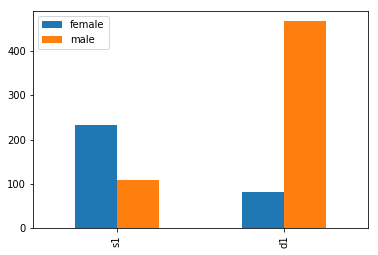

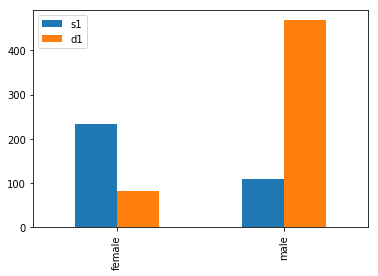

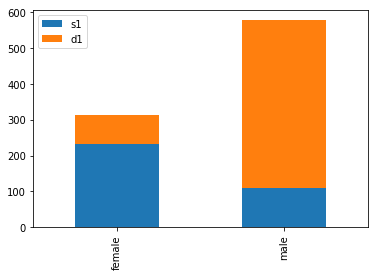

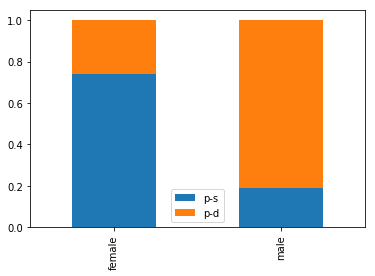

In [26]:
# 绘制柱状图
# 按计数绘制
print(df1.plot.bar())
print(df1.T.plot.bar())
print(df1.T.plot(kind = 'bar',stacked = True))#堆积直方图
# 按比例绘制
dt1 = df1.T
dt1["p-s"] = dt1 .s1 / (dt1.s1 + dt1.d1)
dt1["p-d"] = dt1 .d1 / (dt1.s1 + dt1.d1)
dt11 = dt1[["p-s","p-d"]]# 双括号，截取
print(dt11.plot(kind = 'bar',stacked = True))

#### 2、Age

In [27]:
# 简单统计
#titanic.Age.value_counts()

- 处理空值
- fillna（）函数  **注意填充后生成一个series，原地修改：inplace = True**

29.69911764705882 28.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


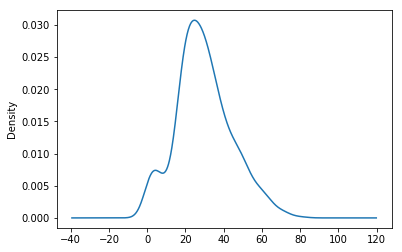

In [28]:
# 处理空值
#均值与中位数
print(titanic.Age.mean(),titanic.Age.median())
#Age绘图
titanic["Age"].plot(kind = "kde")
#用中位数填充空值
titanic.Age.fillna(titanic.Age.mean(),inplace = True)#中位数填充
titanic.to_csv(r"C:\Users\Administrator\Desktop\222.csv",index = False)
titanic.info()

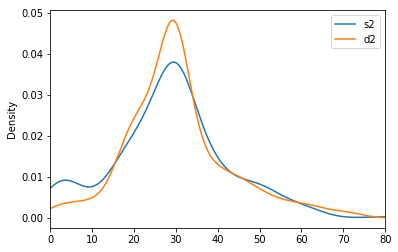

In [29]:
# 与生存的关系
s2 = titanic[titanic.Survived == 1].Age# 生存年龄
d2 = titanic[titanic.Survived == 0].Age# 死亡年龄
# 由series生成DataFrame
df2 =  pd.DataFrame([s2,d2],index = ['s2','d2'])
dt2 = df2.T
dt2
dt2.plot(kind = "kde",xlim = (0,80))# 密度图，限制年龄段

1    55
0    45
Name: Survived, dtype: int64
0    504
1    287
Name: Survived, dtype: int64
         0    1       p-y       p-o
young   45   55  0.450000  0.550000
old    504  287  0.637168  0.362832
            p-y       p-o
young  0.450000  0.550000
old    0.637168  0.362832


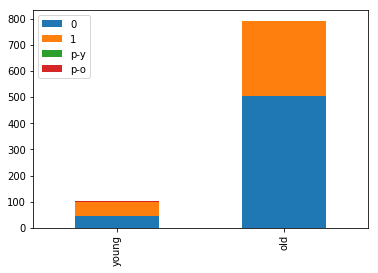

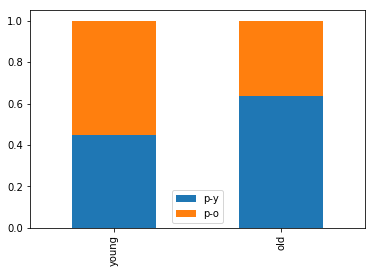

In [86]:
# 年龄离散化后进行分析
young = titanic[titanic.Age<=16].Survived.value_counts()# 生存年龄
old = titanic[titanic.Age > 16].Survived.value_counts() # 死亡年龄
print(young)
print(old)
df2_1 = pd.DataFrame([young,old],index = ["young","old"])
df2_1["p-y"] = df2_1[0] / (df2_1[0] + df2_1[1])
df2_1["p-o"] = df2_1[1] / (df2_1[0] + df2_1[1])
print(df2_1)
# 绘图
df2_1.plot(kind = "bar",stacked = True)

df2_1 = df2_1[["p-y","p-o"]]# 双括号，截取
print(df2_1)
# 绘图
df2_1.plot(kind = "bar",stacked = True)

#### 3.Fare

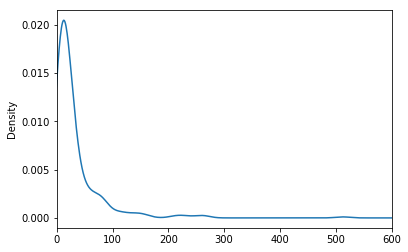

In [76]:
titanic.Fare.plot(kind = "kde",xlim = (0,600))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
s3,NaN,71.2833,7.925,53.1,NaN,NaN,NaN,NaN,11.1333,30.0708,...,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,30.0,NaN
d3,7.25,NaN,NaN,NaN,8.05,8.4583,51.8625,21.075,NaN,NaN,...,7.8958,10.5167,10.5,7.05,29.125,13.0,NaN,23.45,NaN,7.75


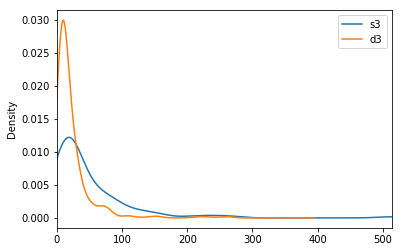

In [95]:
# 与生存的关系
s3 = titanic[titanic.Survived == 1].Fare
d3 = titanic[titanic.Survived == 0].Fare
df3 = pd.DataFrame([s3,d3],index = ["s3","d3"])
df3.T.plot(kind = "kde",xlim = (0,513))
df3

#### 4.name
- 隐含特征

In [137]:
titanic.Name.describe()

count                           891
unique                          891
top       McGough, Mr. James Robert
freq                              1
Name: Name, dtype: object

### 组合特征

#### 年龄与票价

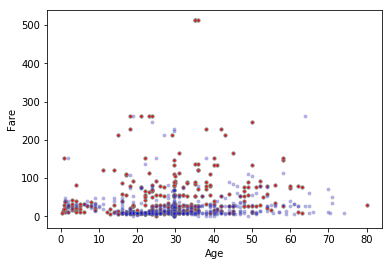

In [136]:
# 绘图
ax = pyplot.subplot()
# 轴标签
ax.set_xlabel("Age")
ax.set_ylabel("Fare")

# 死亡者
Age = titanic[titanic.Survived == 1].Age
Fare = titanic[titanic.Survived == 1].Fare
pyplot.scatter(Age,Fare,s=10, c="red",alpha=1, edgecolors="gray")

# 生还者
Age = titanic[titanic.Survived == 0].Age
Fare = titanic[titanic.Survived == 0].Fare
pyplot.scatter(Age,Fare,s=10, c="blue",alpha=0.3, edgecolors="gray")

In [108]:
pyplot.scatter? # 查看图形属性

In [147]:
# 提取字段：对Name先按“，”再按“.”分割，在2去掉空格，添加新列
titanic["title"] = titanic.Name.apply(lambda name:name.split(',')[1].split('.')[0].strip())
titanic.title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Capt              1
Jonkheer          1
the Countess      1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Name: title, dtype: int64